# **Sprint 14 - Proyecto**

¡Felicidades! Has completado otro curso de la plataforma de entrenamiento. Ahora es el momento perfecto para probar tus habilidades y resolver un nuevo problema de machine learning. Al realizar este proyecto, trabajarás por tu cuenta.

Cuando termines, envía tu trabajo al revisor del proyecto. Recibirás feedback dentro de las siguientes 48 horas. Después de esto, harás los cambios necesarios a tu trabajo y lo enviarás para una segunda revisión. 

Por lo general, este proceso se repetirá varias veces hasta que recibas el visto bueno del revisor y se aprueben todas las correcciones. Todo eso es parte del trabajo.

Tu proyecto se considerará completado una vez que el revisor del proyecto lo apruebe.

Descripción del proyecto
Rusty Bargain es un servicio de venta de coches de segunda mano que está desarrollando una app para atraer a nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial, especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.

A Rusty Bargain le interesa:

- la calidad de la predicción
- la velocidad de la predicción
- el tiempo requerido para el entrenamiento

### **Instrucciones del proyecto**

- Descarga y examina los datos

- Entrena diferentes modelos con varios hiperparámetros (debes hacer al menos dos modelos diferentes, pero más es mejor. Recuerda, varias implementaciones de potenciación del gradiente no cuentan como modelos diferentes). El punto principal de este paso es comparar métodos de potenciación del gradiente con bosque aleatorio, árbol de decisión y regresión lineal.

- Analiza la velocidad y la calidad de los modelos.

### **Observaciones:**

- Utiliza la métrica RECM para evaluar los modelos***

- La regresión lineal no es muy buena para el ajuste de hiperparámetros, pero es perfecta para hacer una prueba de cordura de otros métodos. Si la potenciación del gradiente funciona peor que la regresión lineal, definitivamente algo salió mal.
Aprende por tu propia cuenta sobre la librería LightGBM y sus herramientas para crear modelos de potenciación del gradiente (gradient boosting).

- Idealmente, tu proyecto debe tener regresión lineal para una prueba de cordura, un algoritmo basado en árbol con ajuste de hiperparámetros (preferiblemente, bosque aleatorio), LightGBM con ajuste de hiperparámetros (prueba un par de conjuntos), y CatBoost y XGBoost con ajuste de hiperparámetros (opcional).

- Toma nota de la codificación de características categóricas para algoritmos simples. LightGBM y CatBoost tienen su implementación, pero XGBoost requiere OHE.

- Puedes usar un comando especial para encontrar el tiempo de ejecución del código de celda en Jupyter Notebook. Encuentra ese comando.
Dado que el entrenamiento de un modelo de potenciación del gradiente puede llevar mucho tiempo, cambia solo algunos parámetros del modelo.

- Si Jupyter Notebook deja de funcionar, elimina las variables excesivas por medio del operador del:
 
  `del features_train`
  
### **Descripción de los datos**

El dataset está almacenado en el archivo `/datasets/car_data.csv.` descargar dataset.

##### **Características**

> - DateCrawled — fecha en la que se descargó el perfil de la base de datos
> - VehicleType — tipo de carrocería del vehículo
> - RegistrationYear — año de matriculación del vehículo
> - Gearbox — tipo de caja de cambios
> - Power — potencia (CV)
> - Model — modelo del vehículo
> - Mileage — kilometraje (medido en km de acuerdo con las especificidades regionales del conjunto de datos)
> - RegistrationMonth — mes de matriculación del vehículo
> - FuelType — tipo de combustible
> - Brand — marca del vehículo
> - NotRepaired — vehículo con o sin reparación
> - DateCreated — fecha de creación del perfil
> - NumberOfPictures — número de fotos del vehículo
> - PostalCode — código postal del propietario del perfil (usuario)
> - LastSeen — fecha de la última vez que el usuario estuvo activo

##### **Objetivo**

> - Price — precio (en euros)

### **Evaluación del proyecto**

Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

Esto es en lo que se fijarán los revisores al examinar tu proyecto:

- ¿Seguiste todos los pasos de las instrucciones?
- ¿Cómo preparaste los datos?
- ¿Qué modelos e hiperparámetros consideraste?
- ¿Conseguiste evitar la duplicación del código?
- ¿Cuáles son tus hallazgos?
- ¿Mantuviste la estructura del proyecto?
- ¿Mantuviste el código ordenado?

Ya tienes tus hojas informativas y los resúmenes de los capítulos, por lo que todo está listo para continuar con el proyecto.

¡Buena suerte!

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## **0. Librerías y estilos**

In [1]:
# Se importan librerías necesarias

# Manipulación de datos
import pandas as pd
import numpy as np
import time
import joblib

# Conexión a la base de datos
import sqlite3
from sqlalchemy import create_engine
import pyarrow

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Estadística
from scipy import stats as st

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor, early_stopping, log_evaluation
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler


# Métricas y visualización de resultados
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    make_scorer
)

# Control de advertencias
import warnings
warnings.filterwarnings('ignore')


# Se establece el estilo gráfico general para las visualizaciones
sns.set(style='darkgrid')
plt.rcParams['axes.facecolor'] = '#1e1e1e'
plt.rcParams['axes.edgecolor'] = '#555'
plt.rcParams['figure.facecolor'] = '#1e1e1e'
plt.rcParams['text.color'] = '#f0f0f0'
plt.rcParams['axes.labelcolor'] = '#f0f0f0'
plt.rcParams['xtick.color'] = '#f0f0f0'
plt.rcParams['ytick.color'] = '#f0f0f0'

In [2]:
# Se define función para mostrar múltiples DataFrames con estilo mejorado
# Meramente estético

def mostrar_dfs(dfs, wide_titles=None):
    """
    Muestra múltiples DataFrames con estilo HTML adaptado para modo oscuro y visualización más cómoda.

    Parámetros:
    - dfs: lista de tuplas (titulo, df, head_n, [opcional] is_wide)
      ejemplo: [("Título 1", df1, 10), ("Título 2", df2, None, True)]
    - wide_titles: lista de títulos que deben mostrarse a ancho completo
    """
    if wide_titles is None:
        wide_titles = []

    html_blocks = []

    for item in dfs:
        if len(item) == 4:
            title, df, head_n, is_wide = item
        else:
            title, df, head_n = item
            is_wide = title in wide_titles

        if head_n is not None:
            df = df.head(head_n)

        table_html = df.to_html(index=True)

        css_class = "df-box wide" if is_wide else "df-box"

        block = f"""
        <div class="{css_class}">
            <h3>{title}</h3>
            {table_html}
        </div>
        """
        html_blocks.append(block)

    full_html = f"""
    <style>
        table {{
            width: auto;
            max-width: 100%;
            border-collapse: collapse;
            font-size: 13px;
            background-color: #1e1e1e;
            color: #f0f0f0;
        }}
        th, td {{
            border: 1px solid #444;
            padding: 6px;
            text-align: center;
            white-space: normal;
            overflow-wrap: break-word;
        }}
        th {{
            background-color: #2a2a2a;
            font-weight: bold;
            color: #ffffff;
        }}
        table th:first-child,
        table td:first-child {{
            width: 10%;
        }}
        h3 {{
            margin-top: 0;
            font-size: 16px;
            color: #f2f2f2;
        }}
        .df-container {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(400px, 1fr));
            gap: 20px;
            margin-bottom: 30px;
        }}
        .df-box {{
            border: 1px solid #555;
            border-radius: 6px;
            padding: 10px;
            background-color: #2b2b2b;
            overflow-x: auto;
            box-shadow: 1px 1px 4px rgba(0,0,0,0.4);
        }}
        .df-box.wide {{
            grid-column: 1 / -1;
        }}
    </style>
    <div class="df-container">
        {''.join(html_blocks)}
    </div>
    """

    display(HTML(full_html))


# Se establece el estilo gráfico general para las visualizaciones
sns.set(style='darkgrid')
plt.rcParams['axes.facecolor'] = '#1e1e1e'
plt.rcParams['axes.edgecolor'] = '#555'
plt.rcParams['figure.facecolor'] = '#1e1e1e'
plt.rcParams['text.color'] = '#f0f0f0'
plt.rcParams['axes.labelcolor'] = '#f0f0f0'
plt.rcParams['xtick.color'] = '#f0f0f0'
plt.rcParams['ytick.color'] = '#f0f0f0'

## **1. Introducción del proyecto**
En este proyecto se entrenan diversos modelos para predecir el precio de vehículos usados a partir de características técnicas y datos históricos, con el objetivo de asistir al servicio Rusty Bargain en su aplicación móvil. Se evaluará la calidad de la predicción, la velocidad del modelo y el tiempo de entrenamiento.

## **2. Preparación de datos**

In [3]:
car_data = pd.read_csv('../datasets/car_data.csv')
car_data.info()
car_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [4]:
car_data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


### **2.1 Revisión y limpieza de datos**

En esta etapa se identifican registros con valores anómalos o inconsistentes en variables numéricas clave como el año de matriculación (`RegistrationYear`) y la potencia del vehículo (`Power`). Se observa, por ejemplo, que existen autos con año de registro igual al 1000 o superior al año actual (2025), así como vehículos con potencia igual a cero o extremadamente alta (hasta 20,000 CV), lo cual no es realista para coches convencionales.

Además, se detectan registros con precio igual a cero, lo que no tiene sentido para un sistema de predicción de valor de mercado. Estos valores deben ser eliminados para no distorsionar los resultados del modelo.


In [5]:
# Se eliminan columnas irrelevantes para el modelo
car_data = car_data.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures', 'PostalCode'], axis=1)

# Se eliminan entradas con precios nulos o cero
car_data = car_data[car_data['Price'] > 100]

# Se eliminan registros con años de registro anómalos
car_data = car_data[(car_data['RegistrationYear'] >= 1990) & (car_data['RegistrationYear'] <= 2022)]

# Se eliminan valores extremos de potencia
car_data = car_data[(car_data['Power'] > 10) & (car_data['Power'] < 500)]

# Se rellenan nulos de categóricas con 'unknown'
for col in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']:
    car_data[col] = car_data[col].fillna('unknown')


In [18]:
car_data['RegistrationYear'].describe()

count    297811.000000
mean       2003.837471
std           5.980777
min        1990.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2019.000000
Name: RegistrationYear, dtype: float64

In [6]:
car_data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth
count,297811.000000,297811.000000,297811.000000,297811.000000,297811.000000
mean,4822.943689,2003.837471,120.680220,128831.003556,5.987640
std,4576.094819,5.980777,52.947902,36271.364537,3.595809
min,101.000000,1990.000000,11.000000,5000.000000,0.000000
25%,1350.000000,1999.000000,77.000000,125000.000000,3.000000
50%,3150.000000,2004.000000,111.000000,150000.000000,6.000000
75%,6950.000000,2008.000000,150.000000,150000.000000,9.000000
max,20000.000000,2019.000000,490.000000,150000.000000,12.000000


In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297811 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              297811 non-null  int64 
 1   VehicleType        297811 non-null  object
 2   RegistrationYear   297811 non-null  int64 
 3   Gearbox            297811 non-null  object
 4   Power              297811 non-null  int64 
 5   Model              297811 non-null  object
 6   Mileage            297811 non-null  int64 
 7   RegistrationMonth  297811 non-null  int64 
 8   FuelType           297811 non-null  object
 9   Brand              297811 non-null  object
 10  NotRepaired        297811 non-null  object
dtypes: int64(5), object(6)
memory usage: 27.3+ MB


### **2.2 Justificación de la depuración aplicada**

Luego de eliminar columnas irrelevantes, registros con valores fuera de rango o inconsistentes y de rellenar nulos categóricos con `'unknown'`, el tamaño del conjunto de datos se redujo de **354,369 a 297,811 registros**, es decir, aproximadamente un **15%** del total original.

A pesar de esta depuración, se conserva una base de datos sólida con casi **300 mil observaciones**, lo que resulta más que suficiente para entrenar modelos robustos de regresión, sin riesgo de sobreajuste por escasez de datos. Esta limpieza garantiza mayor calidad en los resultados del modelo sin comprometer su viabilidad técnica.


### **2.3 Preparación del conjunto de datos para el modelado**

En esta etapa se separa la variable objetivo `Price` de las características predictoras. Luego se realiza la división del conjunto de datos en subconjuntos de entrenamiento y prueba, utilizando una proporción 75/25, con una semilla (`random_state`) fija para asegurar la reproducibilidad de los resultados.

A continuación, se identifican las variables numéricas y categóricas. Las variables numéricas serán estandarizadas mediante `StandardScaler`, lo cual transforma su distribución para que tengan media cero y desviación estándar uno. Este paso es fundamental en modelos sensibles a la escala, como la regresión lineal o KNN, ya que evita que variables con valores grandes dominen el proceso de aprendizaje.

Las variables categóricas, por otro lado, se transformarán utilizando `OneHotEncoder`. Esta técnica convierte cada categoría única en una nueva columna binaria: si la observación pertenece a esa categoría, se asigna un 1; en caso contrario, un 0. De esta forma, los datos categóricos son representados como vectores numéricos, lo que permite que los algoritmos de machine learning los procesen correctamente, sin introducir un orden arbitrario que distorsione la interpretación (como ocurriría con `LabelEncoder` o codificación ordinal).

Aunque este proceso puede aumentar significativamente la dimensionalidad del conjunto de datos, especialmente con columnas de alta cardinalidad como el modelo del vehículo, esta transformación facilita que los algoritmos identifiquen patrones y relaciones no lineales en los datos categóricos. Además, la implementación de `OneHotEncoder` es altamente optimizada: por defecto, produce matrices dispersas que no almacenan ceros, lo que permite mantener una buena eficiencia computacional incluso con grandes volúmenes de datos.

Todas estas transformaciones se integran utilizando `ColumnTransformer`, una herramienta que permite aplicar distintos preprocesamientos a diferentes tipos de columnas dentro de un mismo flujo. Esta modularidad facilita la construcción de pipelines de modelado limpios, reproducibles y listos para entrenamiento.


In [8]:
# Se separan características y variable objetivo
X = car_data.drop('Price', axis=1)
y = car_data['Price']

# Se divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=848)

# Se identifican columnas numéricas y categóricas
num_cols = ['RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth']
cat_cols = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

# Se ajustan las columnas como categoricas para los algoritmos (CatBoost y LGBM)
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Se define el preprocesador para los modelos que lo requieran (LR, DT, RF, XGB)
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Se aplica el preprocesador a los datos de entrenamiento
X_train_processed = preprocessor.fit_transform(X_train)

# Se aplica la transformación a los datos de prueba
X_test_processed = preprocessor.transform(X_test)

In [9]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [10]:
y_train.describe()

count    223358.000000
mean       4820.619467
std        4575.703869
min         101.000000
25%        1350.000000
50%        3100.000000
75%        6950.000000
max       20000.000000
Name: Price, dtype: float64

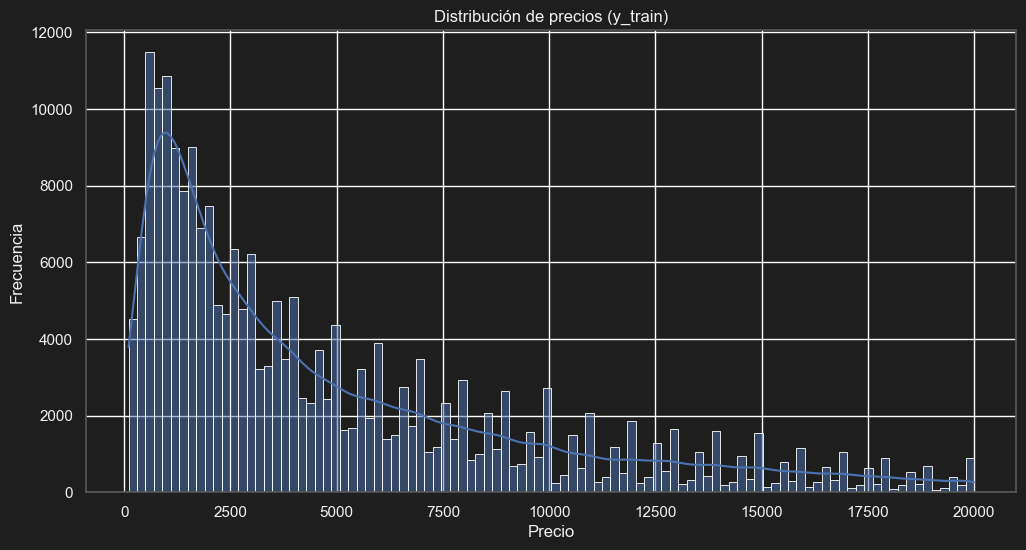

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(y_train, bins=100, kde=True)

plt.title("Distribución de precios (y_train)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

In [12]:
y_train.sort_values(ascending=False).head(10)


329923    20000
105737    20000
315772    20000
291358    20000
194133    20000
285893    20000
231761    20000
17243     20000
165004    20000
139739    20000
Name: Price, dtype: int64

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223358 entries, 134519 to 154188
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   VehicleType        223358 non-null  category
 1   RegistrationYear   223358 non-null  int64   
 2   Gearbox            223358 non-null  category
 3   Power              223358 non-null  int64   
 4   Model              223358 non-null  category
 5   Mileage            223358 non-null  int64   
 6   RegistrationMonth  223358 non-null  int64   
 7   FuelType           223358 non-null  category
 8   Brand              223358 non-null  category
 9   NotRepaired        223358 non-null  category
dtypes: category(6), int64(4)
memory usage: 10.0 MB


### **2.4 Transformación del conjunto de entrenamiento y prueba**

En esta etapa, se aplica el preprocesador definido anteriormente. Primero, se ajusta (`fit`) y transforma (`transform`) el conjunto de entrenamiento (`X_train`). Esto permite que el preprocesador aprenda los parámetros necesarios, como la media y desviación estándar para el escalado numérico, y las categorías únicas para el codificador `OneHotEncoder`.

Luego, se transforma el conjunto de prueba (`X_test`) utilizando los parámetros previamente aprendidos. Esto garantiza que no haya fuga de datos (data leakage), ya que la información del conjunto de prueba no influye en el entrenamiento del modelo.

Como resultado, tanto los datos de entrenamiento como los de prueba están ahora en formato numérico y listos para ser utilizados en el entrenamiento y evaluación del modelo.


In [14]:
# Se obtiene el nombre de columnas generadas por OneHotEncoder
ohe = preprocessor.named_transformers_['cat']
ohe_columns = ohe.get_feature_names_out(cat_cols)

# Se combinan los nombres de las columnas numéricas y categóricas transformadas
all_columns = num_cols + list(ohe_columns)

# Se convierte X_train_processed en un DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed.toarray(), columns=all_columns, index=X_train.index)


In [15]:
print(list(X_train_processed_df.columns))
X_train_processed_df.columns

['RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth', 'VehicleType_bus', 'VehicleType_convertible', 'VehicleType_coupe', 'VehicleType_other', 'VehicleType_sedan', 'VehicleType_small', 'VehicleType_suv', 'VehicleType_unknown', 'VehicleType_wagon', 'Gearbox_auto', 'Gearbox_manual', 'Gearbox_unknown', 'Model_100', 'Model_145', 'Model_147', 'Model_156', 'Model_159', 'Model_1_reihe', 'Model_1er', 'Model_200', 'Model_2_reihe', 'Model_300c', 'Model_3_reihe', 'Model_3er', 'Model_4_reihe', 'Model_500', 'Model_5_reihe', 'Model_5er', 'Model_601', 'Model_6_reihe', 'Model_6er', 'Model_7er', 'Model_80', 'Model_850', 'Model_90', 'Model_900', 'Model_9000', 'Model_911', 'Model_a1', 'Model_a2', 'Model_a3', 'Model_a4', 'Model_a5', 'Model_a6', 'Model_a8', 'Model_a_klasse', 'Model_accord', 'Model_agila', 'Model_alhambra', 'Model_almera', 'Model_altea', 'Model_amarok', 'Model_antara', 'Model_arosa', 'Model_astra', 'Model_auris', 'Model_avensis', 'Model_aveo', 'Model_aygo', 'Model_b_klasse', 'Model_b

Index(['RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth',
       'VehicleType_bus', 'VehicleType_convertible', 'VehicleType_coupe',
       'VehicleType_other', 'VehicleType_sedan', 'VehicleType_small',
       ...
       'Brand_sonstige_autos', 'Brand_subaru', 'Brand_suzuki', 'Brand_toyota',
       'Brand_trabant', 'Brand_volkswagen', 'Brand_volvo', 'NotRepaired_no',
       'NotRepaired_unknown', 'NotRepaired_yes'],
      dtype='object', length=316)

In [19]:
X_train_processed_df['RegistrationYear'].describe()

count    2.233580e+05
mean     1.016114e-14
std      1.000002e+00
min     -2.312564e+00
25%     -8.088957e-01
50%      2.647586e-02
75%      6.947731e-01
max      2.532591e+00
Name: RegistrationYear, dtype: float64

### **2.4 Visualización del conjunto de entrenamiento transformado**

Después de aplicar el preprocesador, se convierte el resultado de `X_train_processed` en un `DataFrame` de pandas llamado `X_train_processed_df`, con el fin de facilitar su inspección visual. Esta conversión no es necesaria para el entrenamiento del modelo, pero permite analizar en detalle qué transformaciones se han realizado sobre las variables originales.

Durante el procesamiento, las variables numéricas fueron estandarizadas con `StandardScaler`, y las categóricas se codificaron con `OneHotEncoder`, generando una columna distinta para cada categoría encontrada. Por ejemplo, la columna `FuelType` se descompuso en columnas como `FuelType_petrol`, `FuelType_diesel`, etc.

Como resultado, el conjunto de entrenamiento pasó de tener 11 columnas originales a un total de 316 columnas. Este aumento en la dimensionalidad es completamente esperado y deseable cuando se utiliza codificación one-hot, ya que se representa cada categoría como una variable binaria sin imponer ningún orden artificial.

Dado que la mayoría de estas nuevas columnas contienen ceros (por ejemplo, si un coche es `audi`, las columnas correspondientes a otras marcas serán cero), el resultado original del preprocesador es una **matriz dispersa** (`sparse matrix`). Este tipo de estructura no guarda todos los ceros explícitamente, sino que solo almacena la ubicación y valor de los elementos distintos de cero. Esto permite optimizar el uso de memoria y acelerar los cálculos.

Para poder visualizar este contenido como un `DataFrame`, fue necesario convertir dicha matriz dispersa a una matriz densa utilizando `.toarray()`. Esta conversión permite observar todas las columnas generadas y entender mejor la representación final que reciben los modelos de aprendizaje automático.


## **3. Estructuración de los modelos**

### **3.1 Proceso de modelado**

Con los datos completamente transformados y listos para el entrenamiento, se procede a evaluar diferentes modelos de regresión que permitan predecir el valor de mercado de los vehículos.

El proyecto establece como prioridad la calidad de la predicción, la velocidad de predicción y el tiempo de entrenamiento. Por ello, se compararán múltiples enfoques:

- Regresión lineal como prueba de cordura.
- Árboles de decisión simples para observar la segmentación directa.
- Bosques aleatorios (Random Forest) como modelo basado en ensamblado de árboles.
- Modelos de potenciación del gradiente (Gradient Boosting), como:
  - **CatBoost**
  - **LightGBM**
  - **XGBoost** (opcional)

Se utilizará la métrica RMSE (root mean squared error) para evaluar la calidad de los modelos, y se medirá el tiempo de entrenamiento y predicción para evaluar la eficiencia de cada enfoque.

El objetivo de esta sección es identificar qué modelo ofrece el mejor balance entre precisión y eficiencia para su eventual integración en la aplicación de Rusty Bargain.


#### **3.1.1 Potenciación del gradiente y el rol de CatBoost en el modelado**

Uno de los enfoques más potentes en regresión es la **potenciación del gradiente** (*Gradient Boosting*). Esta técnica se basa en el concepto de **ensamblado secuencial de modelos débiles**, generalmente árboles de decisión de baja profundidad, que se corrigen mutuamente:

- Se entrena un modelo base (por ejemplo, un árbol simple).
- Se evalúan sus errores residuales.
- Se entrena un nuevo modelo para predecir esos errores.
- Este proceso se repite de forma iterativa.
- Finalmente, se combinan todos los modelos en un ensamblado que ajusta cada vez mejor las predicciones.

El resultado es un modelo robusto que mejora progresivamente y logra gran precisión, aunque a costa de mayor tiempo de entrenamiento.

En este contexto, se utilizará **CatBoost** (*Categorical Boosting*), una biblioteca desarrollada por Yandex, que implementa este enfoque de forma eficiente y con características clave:

- **Manejo nativo de variables categóricas**, sin necesidad de `OneHotEncoder`.
- **Prevención de overfitting** mediante técnicas avanzadas de ordenamiento y permutación aleatoria.
- **Rendimiento competitivo**, con tiempos de entrenamiento razonables y alta calidad en la predicción.

Gracias a estas propiedades, CatBoost es ideal para este proyecto, que contiene múltiples variables categóricas como `Model`, `Brand` o `FuelType`.

Sin embargo, el proyecto requiere **evaluar y comparar diferentes modelos**, por lo que no basta con usar únicamente CatBoost. Se deben considerar modelos base (como la regresión lineal), árboles de decisión simples, modelos de ensamblado como Random Forest, y otros enfoques de potenciación del gradiente como LightGBM o XGBoost.

Esto permitirá identificar el mejor balance entre precisión, velocidad de predicción y tiempo de entrenamiento, y tomar una decisión técnica bien justificada.


#### **3.1.2 Ajuste de hiperparámetros en modelos de regresión**

Un modelo de machine learning tiene dos tipos de parámetros:

- **Parámetros del modelo**: se aprenden automáticamente durante el entrenamiento (por ejemplo, los coeficientes en una regresión lineal).
- **Hiperparámetros**: no se aprenden directamente del entrenamiento, sino que se **definen previamente** y controlan el comportamiento del algoritmo. Elegirlos adecuadamente tiene un impacto directo en el rendimiento del modelo.

El proceso de encontrar los hiperparámetros óptimos se conoce como **ajuste de hiperparámetros** (*hyperparameter tuning*). Este proceso generalmente se realiza mediante:

- **Grid Search**: prueba sistemática de combinaciones en una grilla predefinida.
- **Random Search**: prueba aleatoria de combinaciones posibles.
- **Bayesian Optimization** (opcional, más avanzado): búsqueda inteligente basada en funciones de probabilidad.

##### **¿Dónde se aplican?**

En este proyecto, el ajuste de hiperparámetros se aplicará principalmente a modelos más complejos como:

- **Árbol de Decisión**:
  - `max_depth`: profundidad máxima del árbol.
  - `min_samples_split`: mínimo número de muestras para dividir un nodo.
  - `min_samples_leaf`: mínimo número de muestras por hoja.

- **Random Forest**:
  - `n_estimators`: cantidad de árboles en el bosque.
  - `max_depth`, `max_features`, `bootstrap`: controlan cómo se entrenan los árboles y con cuánta variedad.

- **CatBoost / LightGBM / XGBoost** (potenciación del gradiente):
  - `learning_rate`: tamaño del paso de cada iteración (tasa de aprendizaje).
  - `n_estimators`: cantidad de iteraciones o modelos base.
  - `depth` o `max_depth`: complejidad del árbol base.
  - `l2_leaf_reg`: regularización para evitar overfitting.
  - `early_stopping_rounds`: para cortar el entrenamiento si no hay mejora.

Estos hiperparámetros afectan tanto la **precisión** como la **velocidad de entrenamiento**. Un modelo con hiperparámetros mal ajustados puede sobreajustarse (*overfitting*) o quedarse corto (*underfitting*).

En este proyecto, el ajuste se hará de forma progresiva: primero se entrena cada modelo con hiperparámetros por defecto, y luego se seleccionan algunos valores para mejorar el rendimiento, controlando también el tiempo de ejecución.

El objetivo es encontrar el mejor balance entre **calidad predictiva, eficiencia y generalización**.


### **3.2 Regresión Lineal: prueba de cordura**

Se inicia el proceso de modelado con una regresión lineal, un modelo simple y explicativo. Su objetivo en este contexto no es competir en precisión, sino servir como una **prueba de cordura**:

- Si modelos más complejos (como Random Forest o CatBoost) no superan su rendimiento, significa que algo está fallando en la preparación o configuración del pipeline.
- Su entrenamiento es extremadamente rápido, lo cual permite establecer una línea base tanto de precisión como de eficiencia.

Se evaluará el modelo utilizando la métrica **RMSE** (root mean squared error) y se medirá tanto el **tiempo de entrenamiento** como el **tiempo de predicción**.


In [20]:
# Se instancia el modelo
LR_model = LinearRegression()

# Se registra el tiempo de entrenamiento
start_time = time.time()
LR_model_fit = LR_model.fit(X_train_processed, y_train)
train_time_LR = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_LR:.10f} segundos")

# Se guarda el modelo entrenado en un archivo
joblib.dump(LR_model_fit, '../models/LR_model_trained_car_price.joblib')

Tiempo de entrenamiento: 4.0959994793 segundos


['../models/LR_model_trained_car_price.joblib']

In [44]:
# Se carga el modelo entrenado desde el archivo
LR_model_trained = joblib.load('../models/LR_model_trained_car_price.joblib')

# Se registra el tiempo de predicción
start_time = time.time()
y_pred_LR = LR_model_trained.predict(X_test_processed)
pred_time_LR = time.time() - start_time

# Se calcula la métrica RMSE
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))

# Se muestran los resultados
print("Modelo: Regresión Lineal")
print(f"RMSE: {rmse_LR:.10f}")
print(f"Tiempo de predicción: {pred_time_LR:.10f} segundos")
print(f"Tiempo de entrenamiento: {train_time_LR:.10f} segundos")

Modelo: Regresión Lineal
RMSE: 2321.7601468411
Tiempo de predicción: 0.0067834854 segundos
Tiempo de entrenamiento: 4.0959994793 segundos


In [52]:
# Se obtienen los coeficientes (pesos) y el intercepto
pesos_LR = LR_model_trained.coef_
intercepto_LR = LR_model_trained.intercept_

# Se muestra el valor de los pesos y el intercepto
pesos_LR.shape


mse_vector = (y_test - y_pred_LR)**2
mae_vector = np.abs(y_test - y_pred_LR)

In [71]:
pesos_LR.shape

(316,)

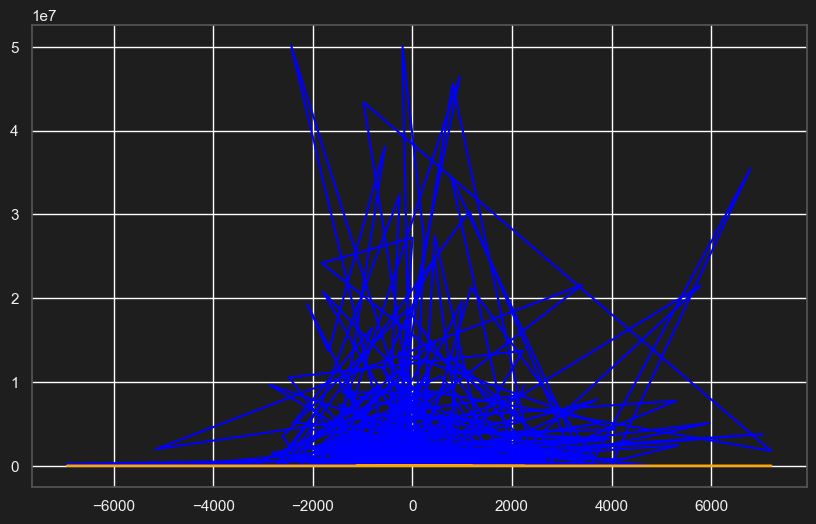

In [60]:
mae = np.mean(np.abs(y_test - y_pred_LR))

# Se grafican ambas funciones de pérdida
plt.figure(figsize=(10, 6))
plt.plot(pesos_LR, mse_vector.head(316), label='MSE (Error Cuadrático Medio)', color='blue')
plt.plot(pesos_LR, mae_vector.head(316), label='MAE (Error Absoluto Medio)', color='orange')

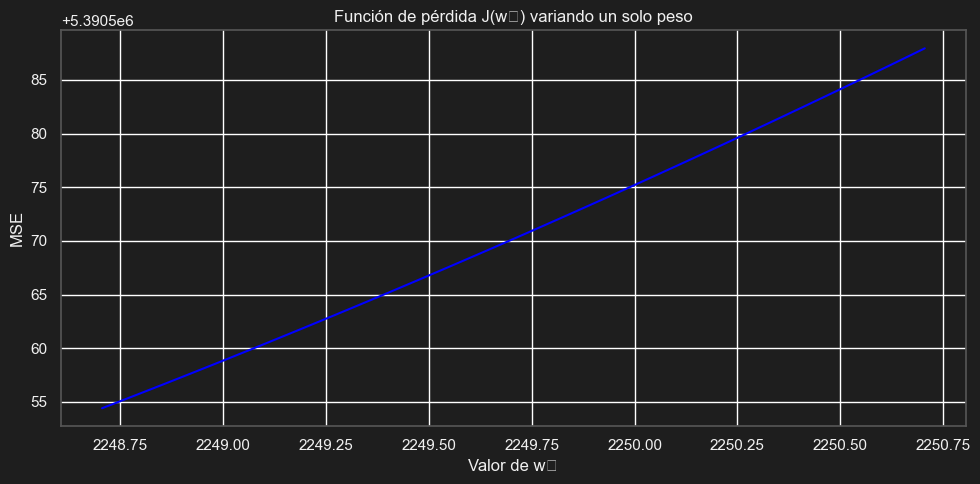

In [75]:
# Se fija el resto de los pesos
w_fijo = pesos_LR.copy()

# Se define un rango de valores para w[0]
w0_range = np.linspace(pesos_LR[0] - 1, pesos_LR[0] + 1, 100)
mse_vals = []

# Se calcula el MSE para cada valor de w0
for w0 in w0_range:
    w_temp = w_fijo.copy()
    w_temp[0] = w0
    y_pred_temp = X_test_processed @ w_temp + intercepto_LR
    mse_temp = np.mean((y_test - y_pred_temp) ** 2)
    mse_vals.append(mse_temp)

# Se grafica la función de pérdida en función de w0
plt.figure(figsize=(10, 5))
plt.plot(w0_range, mse_vals, color='blue')
plt.xlabel('Valor de w₀')
plt.ylabel('MSE')
plt.title('Función de pérdida J(w₀) variando un solo peso')
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
w_temp_df = pd.DataFrame(w_temp)
w_temp_df

,0
0,2250.705258
1,1656.083669
2,-1131.489037
3,27.606537
4,272.336677
...,...
311,1182.984164
312,149.357003
313,574.749263
314,171.620038


In [70]:
pesos_LR[0]

np.float64(2249.7052583590284)

In [69]:
w0_df = pd.DataFrame(w0_range)
w0_df.describe()

,0
count,100.000000
mean,2249.705258
std,0.586091
min,2248.705258
25%,2249.205258
50%,2249.705258
75%,2250.205258
max,2250.705258


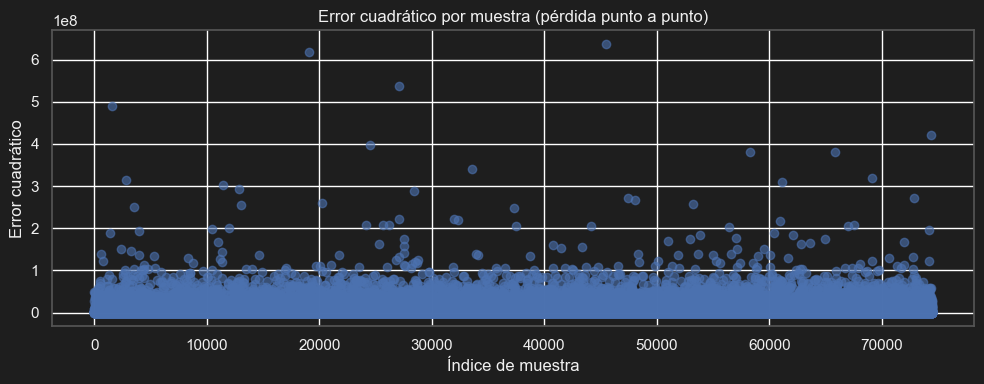

In [51]:


# Se grafica el error cuadrático por muestra
plt.figure(figsize=(10, 4))
plt.plot(mse_vector.values, marker='o', linestyle='', alpha=0.6)
plt.title('Error cuadrático por muestra (pérdida punto a punto)')
plt.xlabel('Índice de muestra')
plt.ylabel('Error cuadrático')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
type(rmse_LR)

numpy.float64

In [23]:
y_pred_LR

array([6650.98245975, 2863.57319533,  612.86108853, ...,  210.99325886,
       8708.16927277, -189.27267293], shape=(74453,))

In [24]:
plt.plot(X_train, y_pred, label=f'w = {w:.1f}')
    
plt.scatter(X, y_noisy, color='black', label='Datos reales (con ruido)', zorder=5)
plt.plot(X, true_y, color='red', linestyle='--', label='Relación real (w=2)')
plt.title('Rectas de predicción vs datos reales')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'y_pred' is not defined

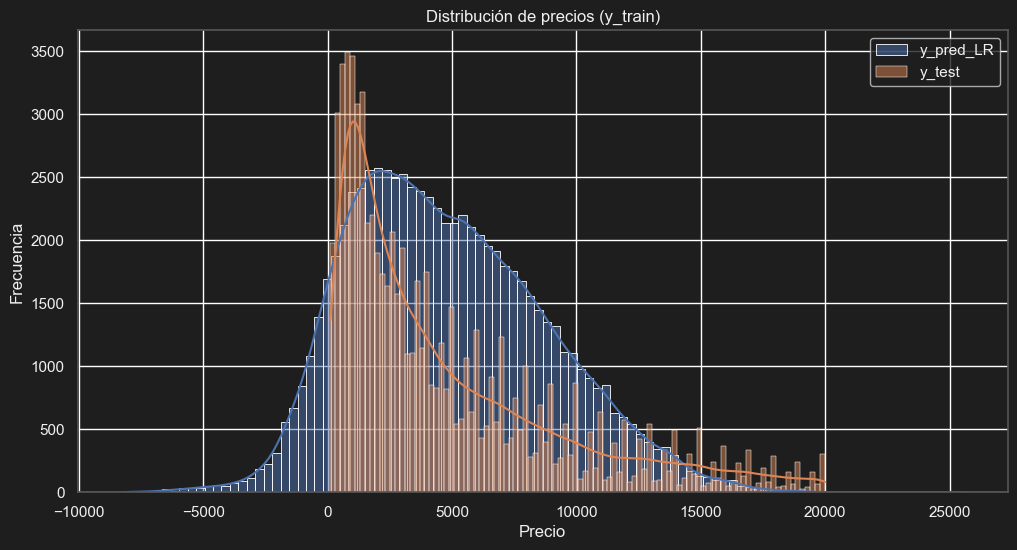

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(y_pred_LR, bins=100, kde=True, label='y_pred_LR')
sns.histplot(y_test, bins=100, kde=True, label='y_test')
plt.title("Distribución de precios (y_train)")
plt.legend()
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

In [40]:
y_pred_serie = pd.DataFrame(y_pred_LR)

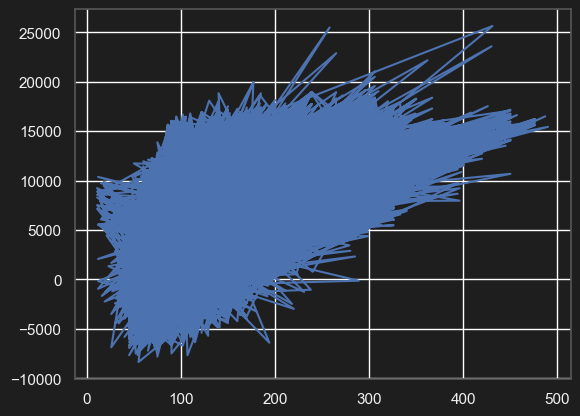

In [42]:
plt.plot(X_test['Power'], y_pred_serie)

In [28]:
[y_test.min(), y_test.max()]

[np.int64(110), np.int64(20000)]

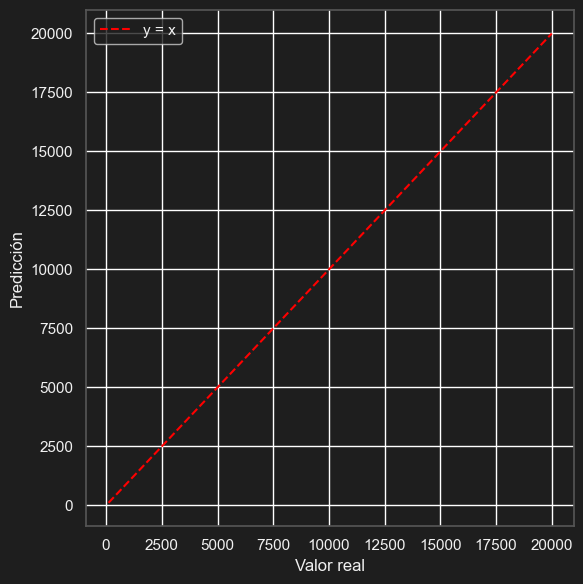

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label='y = x')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

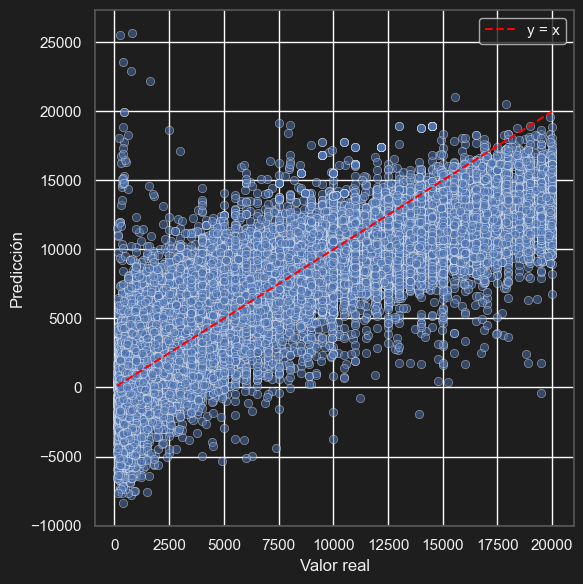

In [73]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_LR, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label='y = x')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **3.3 Árbol de Decisión**

A continuación, se entrena un modelo de **árbol de decisión**. Este tipo de modelo realiza particiones sucesivas sobre las variables predictoras para generar reglas que expliquen la variable objetivo. Es capaz de capturar relaciones no lineales, a diferencia de la regresión lineal.

Sus principales ventajas son la **interpretabilidad** y la **rapidez de entrenamiento**, aunque puede ser propenso al **sobreajuste** si no se limita su profundidad.

En esta primera prueba se usará una configuración inicial con hiperparámetros básicos. Posteriormente, se realizará un ajuste fino para mejorar su rendimiento. Se evalúa utilizando la métrica RMSE, así como los tiempos de entrenamiento y predicción.


In [15]:
# Se instancia el árbol de decisión con profundidad máxima arbitraria
DT_model = DecisionTreeRegressor(max_depth=10, random_state=848)

# Se entrena el modelo y se registra el tiempo
start_time = time.time()
DT_model_fit = DT_model.fit(X_train_processed, y_train)
train_time_DT = time.time() - start_time

print(f"Tiempo de entrenamiento: {train_time_DT:.10f} segundos")

# Se guarda el modelo entrenado en un archivo
joblib.dump(DT_model_fit, '../models/DT_model_trained_car_price.joblib')

Tiempo de entrenamiento: 5.3714208603 segundos


['../models/DT_model_trained_car_price.joblib']

In [16]:
# Se carga el modelo entrenado desde el archivo
DT_model_trained = joblib.load('../models/DT_model_trained_car_price.joblib')

# Se hacen predicciones y se registra el tiempo
start_time = time.time()
y_pred_DT = DT_model_trained.predict(X_test_processed)
pred_time_DT = time.time() - start_time

# Se calcula la métrica RMSE
rmse_DT = mean_squared_error(y_test, y_pred_DT)

# Se muestran los resultados
print("Modelo: Árbol de Decisión")
print(f"RMSE: {rmse_DT:.10f}")
print(f"Tiempo de entrenamiento: {train_time_DT:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_DT:.10f} segundos")

Modelo: Árbol de Decisión
RMSE: 3663043.6150623201
Tiempo de entrenamiento: 5.3714208603 segundos
Tiempo de predicción: 0.0119843483 segundos


#### **Nota: Relación entre el número de combinaciones y el parámetro `cv` en la validación cruzada**

Cuando se realiza una búsqueda de hiperparámetros mediante `GridSearchCV` o `RandomizedSearchCV`, se entrenan múltiples modelos para evaluar cada combinación posible de parámetros. El número total de entrenamientos (o *fits*) depende de dos factores:

- El número de combinaciones de hiperparámetros a evaluar.
- El número de particiones (folds) definido por el parámetro `cv` para la validación cruzada.

Cada combinación se evalúa `cv` veces, una por cada fold. Por lo tanto, el número total de modelos entrenados se calcula con la siguiente fórmula:

```
Total de fits = número de combinaciones × número de folds (cv)
```

Por ejemplo, si se tienen 36 combinaciones de hiperparámetros y se utiliza `cv=3`, se entrenarán en total:

```
36 combinaciones × 3 folds = 108 fits
```

Esto implica que ajustar el número de combinaciones o reducir `cv` puede disminuir considerablemente el tiempo de cómputo necesario para realizar la búsqueda.



#### **3.3.1 Ajuste de hiperparámetros: Árbol de Decisión**

Para mejorar el rendimiento del árbol de decisión, se realiza un ajuste de hiperparámetros utilizando `GridSearchCV`, una herramienta que permite buscar la mejor combinación de parámetros mediante validación cruzada.

Los principales hiperparámetros que se evaluarán son:

- `max_depth`: controla la profundidad máxima del árbol. Un valor bajo evita el sobreajuste, pero puede subestimar relaciones complejas.
- `min_samples_split`: número mínimo de muestras necesarias para dividir un nodo.
- `min_samples_leaf`: número


In [17]:
# Se define el árbol base
DT_model_base = DecisionTreeRegressor(random_state=848)

# Se define el espacio de búsqueda de hiperparámetros
"""param_grid_DT = {
    'max_depth': [10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}"""

param_grid_DT = {
    'max_depth': [5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

# Se configura la búsqueda con validación cruzada
grid_search_DT = GridSearchCV(
    estimator=DT_model_base,
    param_grid=param_grid_DT,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Se ejecuta el ajuste y se registra el tiempo
start_time = time.time()
grid_search_DT.fit(X_train_processed, y_train)
train_time_DT_adjusted = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_DT_adjusted:.10f} segundos")

# Se obtienen los mejores hiperparámetros y el modelo ajustado
best_DT_model_adjusted = grid_search_DT.best_estimator_

# Se guarda el modelo entrenado en un archivo
joblib.dump(best_DT_model_adjusted, '../models/best_DT_model_trained_car_price.joblib')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Tiempo de entrenamiento: 431.8020188808 segundos


['../models/best_DT_model_trained_car_price.joblib']

In [18]:
# Se carga el modelo entrenado desde el archivo
best_DT_model_adjusted_trained = joblib.load('../models/best_DT_model_trained_car_price.joblib')

# Se realiza la predicción y se calcula el RMSE
start_time = time.time()
y_pred_best_DT = best_DT_model_adjusted_trained.predict(X_test_processed)
pred_time_DT_adjusted = time.time() - start_time
rmse_best_DT = mean_squared_error(y_test, y_pred_best_DT)

# Resultados
print("Modelo: Árbol de Decisión (ajustado)")
print(f"Mejores hiperparámetros: {grid_search_DT.best_params_}")
print(f"RMSE: {rmse_best_DT:.10f}")
print(f"Tiempo de entrenamiento: {train_time_DT_adjusted:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_DT_adjusted:.10f} segundos")

Modelo: Árbol de Decisión (ajustado)
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE: 2930971.2331883051
Tiempo de entrenamiento: 431.8020188808 segundos
Tiempo de predicción: 0.0352895260 segundos


### **3.4 Random Forest**

A continuación, se implementa el modelo de **Random Forest**, una técnica de ensamblado que crea múltiples árboles de decisión sobre subconjuntos aleatorios de los datos y luego promedia sus predicciones.

Esta estrategia mejora significativamente la precisión del modelo y reduce el sobreajuste que a menudo afecta a los árboles individuales.

En esta primera etapa se utiliza una configuración inicial básic


In [ ]:
# Se instancia el modelo con parámetros básicos
RF_model = RandomForestRegressor(n_estimators=100, random_state=848, n_jobs=-1)

# Se entrena el modelo y se mide el tiempo
start_time = time.time()
RF_model_fit = RF_model.fit(X_train_processed, y_train)
train_time_RF = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_RF:.10f} segundos")

# Se guarda el modelo entrenado en un archivo
joblib.dump(RF_model_fit, '../models/RF_model_trained_car_price.joblib')

In [ ]:
# Se carga el modelo entrenado desde el archivo
RF_model_trained = joblib.load('../RF_model_trained_car_price.joblib')

# Se hacen predicciones y se mide el tiempo
start_time = time.time()
y_pred_RF = RF_model_trained.predict(X_test_processed)
pred_time_RF = time.time() - start_time

# Se calcula la métrica RMSE
rmse_RF = mean_squared_error(y_test, y_pred_RF)

# Resultados
print("Modelo: Random Forest (básico)")
print(f"RMSE: {rmse_RF:.10f}")
print(f"Tiempo de entrenamiento: {train_time_RF:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_RF:.10f} segundos")


KeyboardInterrupt: 

#### **3.4.1 Ajuste de hiperparámetros: Random Forest**

Para optimizar el rendimiento del modelo de Random Forest, se ajustan varios hiperparámetros clave mediante una búsqueda en cuadrícula (`GridSearchCV`) con validación cruzada.

Los parámetros seleccionados para ajustar son:

- `n_estimators`: número de árboles en el bosque. Más árboles suelen mejorar la precisión, pero aumentan el tiempo de entrenamiento.
- `max_depth`: profundidad máxima de cada árbol. Ayuda a controlar el sobreajuste.
- `min_samples_split`: número mínimo de muestras necesarias para dividir un nodo.
- `min_samples_leaf`: número mínimo de muestras en una hoja.

Este ajuste permite encontrar un equilibrio entre rendimiento, tiempo de entrenamiento y generalización. Se utiliza validación cruzada de 3 pliegues para acelerar el proceso, dada la complejidad del modelo.


In [ ]:
# Se define el modelo base
RF_model_base = RandomForestRegressor(random_state=848, n_jobs=-1)

# Se define la malla de hiperparámetros
param_grid_RF = { 
    'n_estimators': [100, 200], 
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2]
}

"""param_grid_RF = {
    'n_estimators': [100],                     # Fijo en 100
    'max_depth': [10, 20],                     # 2 opciones
    'min_samples_split': [2],                  # Fijo
    'min_samples_leaf': [1]                    # Fijo
}"""

# Se configura la búsqueda
grid_search_RF = GridSearchCV(
    estimator=RF_model_base,
    param_grid=param_grid_RF,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Se entrena con búsqueda
start_time = time.time()
grid_search_RF.fit(X_train_processed, y_train)
train_time_RF_adjusted = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_RF_adjusted:.10f} segundos")

# Se usa el mejor modelo encontrado
best_RF_model_adjusted = grid_search_RF.best_estimator_

# Se guarda el modelo entrenado en un archivo
joblib.dump(best_RF_model_adjusted, '../models/best_RF_model_trained_car_price.joblib')

In [ ]:
# Se carga el modelo entrenado desde el archivo
best_RF_model_adjusted_trained = joblib.load('../models/best_RF_model_trained_car_price.joblib')

# Se predice
start_time = time.time()
y_pred_best_RF = best_RF_model_adjusted_trained.predict(X_test_processed)
pred_time_RF_adjusted = time.time() - start_time
rmse_best_RF = mean_squared_error(y_test, y_pred_best_RF)

# Resultados
print("Modelo: Random Forest (ajustado)")
print(f"Mejores hiperparámetros: {grid_search_RF.best_params_}")
print(f"RMSE: {rmse_best_RF:.10f}")
print(f"Tiempo de entrenamiento: {train_time_RF_adjusted:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_RF_adjusted:.10f} segundos")

### **3.5 XGBoost**

Se entrena un modelo base de XGBoost sin ajuste de hiperparámetros, utilizando sus valores predeterminados. Este paso sirve como punto de referencia para comparar el impacto del ajuste posterior.

Aunque XGBoost es altamente configurable, incluso con su configuración por defecto ofrece un rendimiento competitivo, gracias a su optimización interna y eficiencia en el manejo del ensamble de árboles.

La evaluación se realiza usando la métrica RMSE y se miden los tiempos de entrenamiento y predicción.


In [ ]:
# Modelo base de XGBoost
XGB_model = XGBRegressor(random_state=848, verbosity=0)

# Entrenamiento
start_time = time.time()
XGB_model_fit = XGB_model.fit(X_train_processed, y_train)
train_time_XGB = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_XGB:.10f} segundos")

# Se guarda el modelo entrenado en un archivo
joblib.dump(XGB_model_fit, '../models/XGB_model_trained_car_price.joblib')

In [ ]:
# Se carga el modelo entrenado desde el archivo
XGB_model_trained = joblib.load('../models/XGB_model_trained_car_price.joblib')

# Predicción
start_time = time.time()
y_pred_base_XGB = XGB_model_trained.predict(X_test_processed)
pred_time_XGB = time.time() - start_time

# Métrica
rmse_XGB = mean_squared_error(y_test, y_pred_base_XGB)

# Resultados
print("Modelo base: XGBoost")
print(f"RMSE: {rmse_XGB:.10f}")
print(f"Tiempo de entrenamiento: {train_time_XGB:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_XGB:.10f} segundos")


### **3.5.1 Modelo ajustado: XGBoost con GridSearchCV**

Se realiza ajuste de hiperparámetros mediante `GridSearchCV` sobre un modelo de XGBoost. La selección de hiperparámetros busca mejorar el desempeño en términos de error (RMSE) y control del sobreajuste.

Los parámetros evaluados incluyen:

- `max_depth`: controla la complejidad de los árboles.
- `learning_rate`: determina cuánto se ajusta el modelo a cada paso.
- `n_estimators`: define el número total de árboles en el ensamble.
- `subsample`: controla la fracción de observaciones usadas por árbol.
- `colsample_bytree`: especifica qué fracción de columnas se usan en cada árbol.

Este enfoque permite encontrar una configuración más precisa, logrando generalmente una reducción del error a costa de un mayor tiempo de entrenamiento.


In [ ]:
# Modelo base para ajuste
XGB_base = XGBRegressor(random_state=848, verbosity=0)

# Malla de hiperparámetros
param_grid_XGB = {
    'max_depth': [6, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [500, 1000],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid search
grid_search_XGB = GridSearchCV(
    estimator=XGB_base,
    param_grid=param_grid_XGB,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
start_time = time.time()
grid_search_XGB.fit(X_train_processed, y_train)
train_time_XGB_adjusted = time.time() - start_time

# Mejor estimador
best_XGB_model_adjusted = grid_search_XGB.best_estimator_

# Se guarda el modelo entrenado en un archivo
joblib.dump(best_XGB_model_adjusted, '../models/best_XGB_model_trained_car_price.joblib')

In [ ]:
# Se carga el modelo entrenado desde el archivo
best_XGB_model_adjusted_trained = joblib.load('../models/best_XGB_model_trained_car_price.joblib')

# Predicción
start_time = time.time()
y_pred_best_XGB = best_XGB_model_adjusted_trained.predict(X_test_processed)
pred_time_XGB_adjusted = time.time() - start_time
rmse_best_XGB = mean_squared_error(y_test, y_pred_best_XGB)

# Resultados
print("Modelo: XGBoost (ajustado)")
print(f"Mejores hiperparámetros: {grid_search_XGB.best_params_}")
print(f"RMSE: {rmse_XGB:.10f}")
print(f"Tiempo de entrenamiento: {train_time_XGB_adjusted:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_XGB_adjusted:.10f} segundos")

### **3.6 Análisis detallado de los hiperparámetros utilizados**

Esta sección describe y analiza los hiperparámetros empleados en los modelos entrenados: regresión lineal, árbol de decisión, Random Forest y XGBoost, tanto en su versión base como con ajuste de hiperparámetros. El objetivo es comprender la función de cada hiperparámetro, su impacto en el rendimiento del modelo y las razones por las que es útil ajustarlo.

---

#### **Regresión Lineal**

- **Este modelo no requiere ajuste de hiperparámetros.**  
  Utiliza una solución cerrada basada en mínimos cuadrados para ajustar los coeficientes de forma directa. Es eficiente y sirve como referencia base, pero no permite capturar relaciones no lineales.

---

#### **Árbol de Decisión (con y sin ajuste)**

- **`max_depth`**:  
  - Qué hace: limita la profundidad máxima del árbol.
  - Por qué se usa: evita que el árbol crezca demasiado y sobreajuste los datos.
  - Impacto: 
    - Valores bajos generan árboles simples (subajuste).
    - Valores muy altos o sin límite tienden a memorizar los datos (sobreajuste).

- **`min_samples_split`**:  
  - Qué hace: número mínimo de muestras necesarias para dividir un nodo interno.
  - Por qué se usa: regula cuántos datos debe haber para permitir una partición.
  - Impacto:
    - Valores bajos permiten más divisiones (más complejo).
    - Valores altos restringen el crecimiento (modelo más general).

- **`min_samples_leaf`**:  
  - Qué hace: mínimo número de muestras que debe tener una hoja.
  - Por qué se usa: evita que se creen ramas con muy pocos datos.
  - Impacto:
    - Valores bajos permiten hojas pequeñas (más precisión pero riesgo de sobreajuste).
    - Valores altos simplifican el árbol.

---

#### **Random Forest (con y sin ajuste)**

- **`n_estimators`**:  
  - Qué hace: cantidad de árboles en el bosque.
  - Por qué se usa: incrementa la estabilidad y precisión del modelo.
  - Impacto:
    - Más árboles = mejor rendimiento (hasta cierto punto).
    - Aumenta el tiempo de entrenamiento.

- **`max_depth`**:  
  - Igual que en el árbol de decisión, pero aplicado a cada árbol del bosque.
  - Limita cuánto puede crecer cada árbol individual.

- **`min_samples_split` y `min_samples_leaf`**:  
  - Igual que en el árbol de decisión.
  - Ayudan a controlar el sobreajuste de cada árbol individual.

- **`n_jobs`** (no es un hiperparámetro de aprendizaje, pero relevante):  
  - Qué hace: número de núcleos del procesador a usar.
  - Impacto: mejora el tiempo de entrenamiento al paralelizar.

---

#### **XGBoost (con y sin ajuste)**

- **`n_estimators`**:  
  - Qué hace: número de árboles (etapas) que se construyen secuencialmente.
  - Por qué se usa: controla cuánto puede aprender el modelo.
  - Impacto:
    - Más árboles = más capacidad, pero mayor riesgo de sobreajuste.
    - En boosting, se prefiere combinar con `learning_rate`.

- **`max_depth`**:  
  - Qué hace: profundidad máxima de cada árbol.
  - Por qué se usa: regula la complejidad de cada iteración del boosting.
  - Impacto:
    - Más profundo = más capacidad para modelar relaciones complejas.
    - Riesgo de sobreajuste si es muy alto.

- **`learning_rate`** (también llamado `eta`):  
  - Qué hace: reduce la contribución de cada árbol nuevo.
  - Por qué se usa: permite hacer boosting más gradual.
  - Impacto:
    - Valores bajos hacen que el modelo aprenda más lento pero más robusto.
    - Requiere más `n_estimators`.

- **`subsample`**:  
  - Qué hace: fracción del conjunto de datos usada en cada iteración.
  - Por qué se usa: introduce aleatoriedad para evitar sobreajuste.
  - Impacto:
    - Valores cercanos a 1 usan casi todos los datos.
    - Valores más bajos generan regularización extra.

- **`colsample_bytree`**:  
  - Qué hace: fracción de columnas (features) usadas en cada árbol.
  - Por qué se usa: reduce la correlación entre árboles.
  - Impacto:
    - Mejora la generalización.
    - Combina bien con `subsample`.

---

#### **Consideraciones finales**

- Ajustar hiperparámetros **mejora el rendimiento**, pero puede aumentar significativamente el tiempo de entrenamiento.
- Usar técni


#### **Nota: Aclaración sobre el uso de datos para CatBoost y LightGBM**

A diferencia de modelos como la regresión lineal, árboles de decisión, Random Forest o XGBoost, que requieren una transformación previa de los datos con `StandardScaler` y `OneHotEncoder` (es decir, el uso de `X_train_processed`), los modelos **CatBoost** y **LightGBM** permiten trabajar directamente con las columnas categóricas en su forma original.

Esto significa que **no es necesario aplicar codificación One-Hot ni escalado** para estos algoritmos. Ambos modelos cuentan con mecanismos internos especializados para tratar variables categóricas, lo que ahorra procesamiento y permite preservar mejor la estructura original de los datos.

En consecuencia, para entrenar CatBoost y LightGBM, se utilizarán directamente los conjuntos `X_train` y `X_test`, sin aplicar transformaciones, ya que contienen las variables categóricas tal como aparecen en el DataFrame original.

Este enfoque no solo es más eficiente, sino que también reduce el riesgo de sobreajuste que puede producirse al aumentar excesivamente la dimensionalidad del conjunto de entrenamiento con técnicas como One-Hot Encoding.


### **3.6 LightGBM**

Se implementa el modelo **LightGBM** (`LGBMRegressor`), una variante de Gradient Boosting desarrollada por Microsoft, optimizada para velocidad y bajo consumo de memoria. Su principal ventaja radica en su capacidad de entrenar rápidamente grandes volúmenes de datos, mediante técnicas como histogramas de características y crecimiento asimétrico de árboles.

Al igual que en el caso de CatBoost, se entrena primero un modelo base con hiperparámetros razonables para establecer una línea base de comparación. El entrenamiento y la predicción se realizan sobre los datos ya transformados (`X_train_processed` y `X_test_processed`), permitiendo evaluar consistencia con los modelos anteriores.

La métrica utilizada para evaluar el desempeño sigue siendo RMSE, y se registran los tiempos de entrenamiento y predicción.


In [ ]:
# Se instancia el modelo base
LGBM_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    random_state=848
)

# Entrenamiento
start_time = time.time()
LGBM_model_fit = LGBM_model.fit(X_train, y_train,
               eval_set=[(X_test, y_test)],
               callbacks=[early_stopping(stopping_rounds=50), log_evaluation(0)],
               categorical_feature=cat_cols)
train_time_LGBM = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_LGBM:.10f} segundos")

# Se guarda el modelo entrenado en un archivo
joblib.dump(LGBM_model_fit, '../models/LGBM_model_trained_car_price.joblib')

In [ ]:
# Se carga el modelo entrenado desde el archivo
LGBM_model_trained = joblib.load('../models/LGBM_model_trained_car_price.joblib')

# Predicción
start_time = time.time()
y_pred_LGBM = LGBM_model_trained.predict(X_test)
pred_time_LGBM = time.time() - start_time
rmse_LGBM = mean_squared_error(y_test, y_pred_LGBM)

# Resultados
print("Modelo: LightGBM (básico)")
print(f"RMSE: {rmse_LGBM:.10f}")
print(f"Tiempo de entrenamiento: {train_time_LGBM:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_LGBM:.10f} segundos")

#### **3.6.1 Ajuste de hiperparámetros: LightGBM**

Para optimizar el desempeño del modelo LightGBM, se ajustan algunos de sus hiperparámetros más relevantes:

- `num_leaves`: determina la complejidad del árbol. A mayor valor, mayor capacidad de ajuste.
- `max_depth`: profundidad máxima del árbol. Controla el sobreajuste.
- `learning_rate`: tasa de aprendizaje. Define cuánto se corrige el error en cada iteración.
- `n_estimators`: número total de árboles (iteraci_
 

In [ ]:
# Se define el modelo base para el ajuste
LGBM_model_base = LGBMRegressor(random_state=848)

# Se define la malla de hiperparámetros
param_grid_LGBM = {
    'num_leaves': [31, 50],              
    'max_depth': [6, 10], 
    'learning_rate': [0.05, 0.1], 
    'n_estimators': [500, 1000], 
    'min_child_samples': [20, 40]
}

"""param_grid_LGBM = {
    'num_leaves': [31],              # Valor por defecto razonable
    'max_depth': [6, 10],            # Valores moderados
    'learning_rate': [0.1],          # Aprendizaje controlado
    'n_estimators': [200, 500],      # Menos árboles, más rápido
    'min_child_samples': [20]        # Valor típico
}"""

# Búsqueda en cuadrícula
grid_search_LGBM = GridSearchCV(
    estimator=LGBM_model_base,
    param_grid=param_grid_LGBM,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
start_time = time.time()
grid_search_LGBM.fit(X_train, y_train, categorical_feature=cat_cols)
train_time_LGBM_adjusted = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_LGBM_adjusted:.10f} segundos")

# Mejor modelo encontrado
best_LGBM_model_adjusted = grid_search_LGBM.best_estimator_

# Se guarda el modelo entrenado en un archivo
joblib.dump(best_LGBM_model_adjusted, '../models/best_LGBM_model_trained_car_price.joblib')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 223358, number of used features: 10
[LightGBM] [Info] Start training from score 4820.619467
Modelo: LightGBM (ajustado)
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 500, 'num_leaves': 31}
RMSE: 2176193.8308726018
Tiempo de entrenamiento: 34.2173876762 segundos
Tiempo de predicción: 0.7289683819 segundos


In [ ]:
# Se carga el modelo entrenado desde el archivo
best_LGBM_model_adjusted_trained = joblib.load('../models/best_LGBM_model_trained_car_price.joblib')

# Predicción
start_time = time.time()
y_pred_best_LGBM = best_LGBM_model_adjusted_trained.predict(X_test)
pred_time_LGBM_adjusted = time.time() - start_time
rmse_best_LGBM = mean_squared_error(y_test, y_pred_best_LGBM)

# Resultados
print("Modelo: LightGBM (ajustado)")
print(f"Mejores hiperparámetros: {grid_search_LGBM.best_params_}")
print(f"RMSE: {rmse_best_LGBM:.10f}")
print(f"Tiempo de entrenamiento: {train_time_LGBM_adjusted:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_LGBM_adjusted:.10f} segundos")

### **3.7 CatBoost**

Se implementa a continuación el modelo **CatBoostRegressor**, una variante optimizada de Gradient Boosting desarrollada por Yandex, que se destaca por su manejo eficiente de variables categóricas y su capacidad para reducir el sobreajuste mediante técnicas avanzadas de muestreo y ordenamiento.

En esta primera fase, se entrena el modelo usando los datos ya transformados con `OneHotEncoder`, a fin de compararlo en igualdad de condiciones con los modelos anteriores. Más adelante se evaluará la versión nativa de CatBoost utilizando directamente los datos con variables categóricas originales, sin codificación.

El modelo se entrena con una configuración base, utilizando 1000 iteraciones y la opción `early_stopping_rounds` para detener el entrenamiento si la métrica no mejora durante cierto número de rondas. Se utiliza RMSE como métrica principal y se registran los tiempos de entrenamiento y predicción.


In [ ]:
# Se instancia el modelo con configuración básica
CB_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    verbose=0,
    random_state=848
)

# Se entrena el modelo y se mide el tiempo
start_time = time.time()
CB_model_fit = CB_model.fit(X_train, y_train, 
                            cat_features=cat_cols, 
                            eval_set=(X_test, y_test), 
                            early_stopping_rounds=50,
                            save_snapshot=False,
                            use_best_model=True)
train_time_CB = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time_CB:.10f} segundos")

# Se guarda el modelo entrenado en un archivo
joblib.dump(CB_model_fit, '../models/CB_model_trained_car_price.joblib')

KeyboardInterrupt: 

In [ ]:
# Se carga el modelo entrenado desde el archivo
CB_model_trained = joblib.load('../models/CB_model_trained_car_price.joblib')

# Se hacen predicciones y se mide el tiempo
start_time = time.time()
y_pred_CB = CB_model_trained.predict(X_test)
pred_time_CB = time.time() - start_time

# Se calcula la métrica
rmse_CB = mean_squared_error(y_test, y_pred_CB)

# Resultados
print("Modelo: CatBoost (básico)")
print(f"RMSE: {rmse_CB:.10f}")
print(f"Tiempo de entrenamiento: {train_time_CB:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_CB:.10f} segundos")

#### **3.7.1 Ajuste de hiperparámetros: CatBoost**

Para mejorar el rendimiento del modelo, se ajustan algunos de los hiperparámetros más influyentes de `CatBoostRegressor`:

- `depth`: controla la profundidad de cada árbol. A mayor profundidad, mayor capacidad de ajuste (pero también más riesgo de sobreajuste).
- `learning_rate`: tasa de aprendizaje. Define cuánto se corrige el modelo en cada iteración.
- `l2_leaf_reg`: coeficiente de regularización L2. Controla la complejidad del modelo.
- `iterations`: número total de árboles. Se usa junto a `early_stopping_rounds` para detener el entrenamiento si no hay mejora.

Se usa `GridSearchCV` con validación cruzada de 3 pliegues y la métrica `neg_root_mean_squared_error` para guiar la selección del mejor conjunto de hiperparámetros. Dado que CatBoost ya tiene un sistema interno eficiente de evaluación, este ajuste no debe realizarse con mallas demasiado grandes para evitar tiempos de entrenamiento excesivos.


In [ ]:
# Se define el modelo base
CB_model_base = CatBoostRegressor(
    loss_function='RMSE',
    verbose=0,
    random_state=848
)

# Se define la malla de hiperparámetros
param_grid_CB = {
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [1, 3],
    'iterations': [500, 1000]
}

# Búsqueda en cuadrícula
grid_search_CB = GridSearchCV(
    estimator=CB_model_base,
    param_grid=param_grid_CB,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
start_time = time.time()
grid_search_CB.fit(X_train, y_train, cat_features=cat_cols)
train_time_CB_adjusted = time.time() - start_time

# Mejor modelo
best_CB_model_adjusted = grid_search_CB.best_estimator_

# Se guarda el modelo entrenado en un archivo
joblib.dump(best_CB_model_adjusted, '../models/best_CB_model_trained_car_price.joblib')


In [ ]:
# Se carga el modelo entrenado desde el archivo
best_CB_model_adjusted_trained = joblib.load('../models/best_CB_model_trained_car_price.joblib')

# Predicción
start_time = time.time()
y_pred_best_CB = best_CB_model_adjusted_trained.predict(X_test)
pred_time_CB_adjusted = time.time() - start_time
rmse_best_CB = mean_squared_error(y_test, y_pred_best_CB)

# Resultados
print("Modelo: CatBoost (ajustado)")
print(f"Mejores hiperparámetros: {grid_search_CB.best_params_}")
print(f"RMSE: {rmse_best_CB:.10f}")
print(f"Tiempo de entrenamiento: {train_time_CB_adjusted:.10f} segundos")
print(f"Tiempo de predicción: {pred_time_CB_adjusted:.10f} segundos")

### **Análisis detallado de los hiperparámetros utilizados en LightGBM y CatBoost**

A continuación se presenta una descripción exhaustiva de los hiperparámetros utilizados en los modelos LightGBM y CatBoost, explicando su propósito, relevancia, y cómo su ajuste afecta el comportamiento del modelo. Esta comprensión es esencial para controlar el aprendizaje, optimizar el rendimiento y evitar tanto el sobreajuste como el subajuste.

---

#### **LightGBM (LGBMRegressor)**

- **`n_estimators`**:  
  - Qué hace: número total de árboles que se entrenan en el modelo.
  - Por qué se usa: determina cuántas iteraciones de boosting se aplican.
  - Impacto:
    - Más árboles = mayor capacidad, pero también mayor tiempo de entrenamiento.
    - En combinación con `learning_rate`, define el ritmo de aprendizaje.

- **`learning_rate`**:  
  - Qué hace: controla cuánto aporta cada nuevo árbol.
  - Por qué se usa: balancea velocidad de aprendizaje con capacidad de generalización.
  - Impacto:
    - Valores bajos (ej. 0.01) requieren más árboles pero generalizan mejor.
    - Valores altos (ej. 0.1) aprenden rápido pero arriesgan sobreajuste.

- **`max_depth`**:  
  - Qué hace: profundidad máxima de cada árbol.
  - Por qué se usa: controla la complejidad del árbol y su capacidad para modelar relaciones.
  - Impacto:
    - Profundidad alta: más capacidad, pero riesgo de sobreajuste.
    - Profundidad baja: menos complejidad, más generalización.

- **`num_leaves`**:  
  - Qué hace: número máximo de hojas por árbol.
  - Por qué se usa: determina la complejidad real del árbol.
  - Impacto:
    - A mayor número de hojas, mayor precisión, pero también mayor riesgo de sobreajuste.
    - Es crucial balancear este parámetro con `max_depth`.

- **`min_child_samples`**:  
  - Qué hace: número mínimo de muestras que debe tener una hoja.
  - Por qué se usa: previene que el modelo cree hojas basadas en pocos datos.
  - Impacto:
    - Valores altos generan modelos más simples y generalistas.
    - Valores bajos permiten mayor ajuste local.

- **`categorical_feature`** (no es hiperparámetro de aprendizaje, pero relevante):  
  - Qué hace: lista de columnas categóricas para que LightGBM las maneje internamente.
  - Impacto: mejora rendimiento y evita preprocesamiento adicional.

- **`early_stopping_rounds`** (dentro de `callbacks`):  
  - Qué hace: detiene el entrenamiento si no hay mejora tras cierto número de iteraciones.
  - Impacto: reduce el tiempo y evita sobreentrenamiento.

---

#### **CatBoostRegressor**

- **`iterations`**:  
  - Qué hace: número total de árboles a construir.
  - Por qué se usa: define cuántas veces el modelo refina sus predicciones.
  - Impacto:
    - Más iteraciones = más precisión, pero mayor tiempo y riesgo de sobreajuste.
    - A menudo se ajusta junto con `learning_rate`.

- **`learning_rate`**:  
  - Qué hace: regula cuánto contribuye cada árbol a la predicción final.
  - Por qué se usa: permite entrenar de manera gradual.
  - Impacto:
    - Valores bajos requieren más iteraciones y son más seguros.
    - Valores altos aprenden más rápido, pero arriesgan inestabilidad.

- **`depth`**:  
  - Qué hace: profundidad máxima de cada árbol.
  - Por qué se usa: controla la capacidad de los árboles de capturar relaciones complejas.
  - Impacto:
    - Mayor profundidad = más ajuste, pero mayor riesgo de sobreajuste.
    - Menor profundidad = modelo más general y rápido.

- **`l2_leaf_reg`**:  
  - Qué hace: regularización L2 aplicada a las hojas.
  - Por qué se usa: penaliza grandes valores en las hojas para evitar sobreajuste.
  - Impacto:
    - Valores altos generan regularización fuerte.
    - Valores bajos permiten mayor ajuste, pero menos robustez.

- **`loss_function='RMSE'`**:  
  - Qué hace: define la métrica a optimizar durante el entrenamiento.
  - Por qué se usa: RMSE es adecuada para tareas de regresión.
  - Impacto: garantiza que el modelo minimice el error cuadrático medio.

- **`cat_features`**:  
  - Qué hace: indica las columnas categóricas.
  - Por qué se usa: permite que CatBoost trate automáticamente las variables categóricas.
  - Impacto: mejora precisión y evita necesidad de codificación manual.

- **`early_stopping_rounds`**:  
  - Qué hace: detiene el entrenamiento si no hay mejora tras varias iteraciones.
  - Impacto: acelera el entrenamiento y previene sobreajuste.

---

#### **Reflexión final**

Ambos algoritmos —LightGBM y CatBoost— se destacan por su eficiencia y precisión, especialmente en contextos con variables categóricas y grandes volúmenes de datos.  
Comprender y ajustar estos hiperparámetros permite controlar finamente el aprendizaje del modelo y lograr un excelente equilibrio entre rendimiento, tiempo y generalización.

Un buen ajuste depende del contexto: el tamaño del dataset, la cantidad de variables, la presencia de ruido y el tiempo disponible para entrenar. Por eso, el dominio de estos conceptos es clave para construir modelos verdaderamente competitivos.


## Análisis del modelo

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en orden de ejecución
- [x]  Los datos han sido descargados y preparados
- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos